<a href="https://colab.research.google.com/github/parkjh21c/ML-DL/blob/main/smarthon_model_4%EC%B0%A8_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/smarthon/현대모비스f.xlsx')

df['일자'] = pd.to_datetime(df['일자'])

# 데이터 순서 뒤집고 인덱스 다시 정의
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)
df = df.set_index('일자')

df

,등락률,EPS,PER,선행 EPS,선행 PER,BPS,PBR,주당배당금,배당수익률,공매도 수량_거래량_전체,...,외국인순매수금액(거래소),기관순매수량(거래소),기관순매수금액(거래소),개인순매수량(거래소),개인순매수금액(거래소),환율(원/달러),금리,감정,오늘 주가상승여부,다음날 주가상승여부
일자,,,,,,,,,,,,,,,,,,,,,
2023-01-02,1.00,25645,7.90,34882,5.81,387397,0.52,4000,1.98,14761,...,-3273,-33269,-6786,-9996,-2057,1272.6,3.26,2.139322,1,0
2023-01-03,-0.25,25645,7.88,35205,5.74,387397,0.52,4000,1.98,22184,...,-10695,-28590,-5725,1454,234,1271.0,3.40,0.538730,0,1
2023-01-04,0.50,25645,7.92,35205,5.77,387397,0.52,4000,1.97,16971,...,-6371,-10503,-2101,-18902,-3874,1271.7,2.99,-0.000717,1,1
2023-01-05,1.97,25645,8.07,35205,5.88,387397,0.53,4000,1.93,25576,...,-1696,-22361,-4580,-28483,-5913,1269.4,3.18,-0.225005,1,1
2023-01-06,3.38,25645,8.34,35205,6.08,387397,0.55,4000,1.87,30050,...,-2256,21456,4697,-70547,-15073,1268.6,3.07,6.218025,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.00,37639,6.48,44693,5.46,448144,0.54,4500,1.84,472,...,-2657,18105,4412,-7894,-1924,1450.9,3.11,0.910085,1,0
2024-12-24,-0.41,37639,6.46,44693,5.44,448144,0.54,4500,1.85,247,...,6318,3162,775,-28918,-6983,1457.5,3.07,0.995557,0,0
2024-12-26,-0.41,37639,6.43,44693,5.41,448144,0.54,4500,1.86,396,...,3130,21596,5236,-34305,-8313,1469.6,3.18,2.727830,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   등락률                 489 non-null    float64
 1   EPS                 489 non-null    int64  
 2   PER                 489 non-null    float64
 3   선행 EPS              489 non-null    int64  
 4   선행 PER              489 non-null    float64
 5   BPS                 489 non-null    int64  
 6   PBR                 489 non-null    float64
 7   주당배당금               489 non-null    int64  
 8   배당수익률               489 non-null    float64
 9   공매도 수량_거래량_전체       489 non-null    int64  
 10  공매도 금액_거래대금_전체      489 non-null    int64  
 11  코스피 등락률             489 non-null    float64
 12  이동평균 five           489 non-null    int64  
 13  이동평균ten             489 non-null    int64  
 14  이동평균 twenty         489 non-null    int64  
 15  Bollinger Bands중심선  489 non-null    fl

In [ ]:
df = df.select_dtypes(exclude=["object"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   등락률                 489 non-null    float64
 1   EPS                 489 non-null    int64  
 2   PER                 489 non-null    float64
 3   선행 EPS              489 non-null    int64  
 4   선행 PER              489 non-null    float64
 5   BPS                 489 non-null    int64  
 6   PBR                 489 non-null    float64
 7   주당배당금               489 non-null    int64  
 8   배당수익률               489 non-null    float64
 9   공매도 수량_거래량_전체       489 non-null    int64  
 10  공매도 금액_거래대금_전체      489 non-null    int64  
 11  코스피 등락률             489 non-null    float64
 12  이동평균 five           489 non-null    int64  
 13  이동평균ten             489 non-null    int64  
 14  이동평균 twenty         489 non-null    int64  
 15  Bollinger Bands중심선  489 non-null    fl

주가 그래프(2023/01/01 - 2024/12/31)   
index - 일자, 종가 column 필요

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates


# plt.figure(figsize=(12,6))
# plt.plot(df.index, df['종가'])

# plt.xlabel('Date')
# plt.ylabel('Price($)')

# # x축 범위 설정
# plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-12-31'))

# # x축 눈금 설정
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# # x축 레이블 회전
# plt.xticks(rotation=45)

# plt.yticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

# plt.show()

LSTM + 랜덤포레스트

1. 데이터 분리(섞기 X)   


In [ ]:
from sklearn.model_selection import train_test_split

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]
X= X.rename(str,axis="columns")
train_size = int((len(X) - 1) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


랜덤 포레스트를 통해 중요한 특징 찾기   
( feature_importances_ : 해당 피처가 클래스를 나누는데 얼마나 영향을 미쳤는지를 0 ~ 1로 표기하는 척도)    


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 중요한 특징 선택
important_features = rf.feature_importances_

important_features를 그래프로 나타내어 중요도 비교

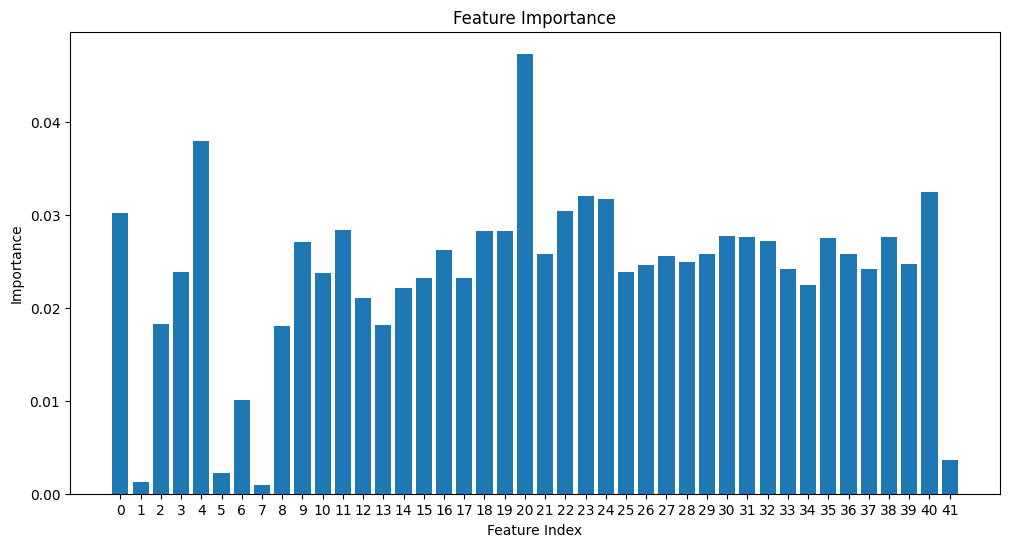

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
plt.bar(important_features.argsort(), important_features[important_features.argsort()])
plt.xticks(np.arange(len(important_features)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

대비 등락률 => 추세 때문에 높은 연관성(예상)


위 Features들을 높은 순서대로 정렬한 뒤, 0.015 이상 선택

In [ ]:
important_features

array([0.03025958, 0.00126583, 0.01829072, 0.02384503, 0.03793231,
       0.00225751, 0.0100856 , 0.0009764 , 0.01806508, 0.02704672,
       0.02371975, 0.0283479 , 0.02105381, 0.01821196, 0.02212949,
       0.02317661, 0.02625073, 0.0232353 , 0.02825083, 0.02825823,
       0.04736622, 0.02578549, 0.03048207, 0.03204375, 0.03170598,
       0.02381615, 0.02466974, 0.0255507 , 0.02494292, 0.02582655,
       0.02775279, 0.02767135, 0.02718362, 0.02416147, 0.02252286,
       0.02751735, 0.02580773, 0.02417173, 0.02760852, 0.02469903,
       0.03243134, 0.00362324])

In [ ]:
top_features = important_features.argsort()[:][::-1] # Feature 선택 수를 변경하고 싶을 시 변경 필요

top_features_indices = []
for i in range(len(top_features)):
  if (top_features[i] >= 0.015):
    top_features_indices.append(top_features[i])

X_train = X_train.iloc[:,top_features_indices]
X_test = X_test.iloc[:,top_features_indices]
X_train.columns

Index(['CCI ', '선행 PER', '감정', 'Slow %D', '이격도 five', 'Slow %K ', '코스피 등락률',
       'ADX', '거래량', 'Chaikin Money Flow', '거래대금', '환율(원/달러)', ' 기관순매수금액(거래소)',
       '외국인순매수량(거래소)', '공매도 수량_거래량_전체', '상한선', 'Signal', ' 개인순매수량(거래소)',
       'MACD Oscillator', 'RSI', 'OBV', '금리', '이격도 twenty', ' 개인순매수금액(거래소)',
       '외국인순매수금액(거래소)', '선행 EPS', '이격도 ten', '공매도 금액_거래대금_전체', '하한선',
       'Bollinger Bands중심선', ' 기관순매수량(거래소)', '이동평균 twenty', '이동평균 five', 'PER',
       '이동평균ten', '배당수익률', 'PBR', '오늘 주가상승여부', 'BPS', 'EPS', '주당배당금'],
      dtype='object')

시가 총액, 상장 주식수, BPS(주당순자산가치), 주당배당금, 외국인 한도수량 은 거의 상관 없거나 아예 상관 없는걸로 보임

In [ ]:
#A, B, C, D
A_train_size = int((len(X_train) - 1)*0.7)
X_A_train, X_C_val = X_train[:A_train_size], X_train[A_train_size:]
y_B_train, y_D_val = y_train[:A_train_size], y_train[A_train_size:]

In [ ]:
print(len(X_A_train), len(y_B_train))
print(len(X_C_val), len(y_D_val))

272 272
118 118


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 스케일링
scaler = MinMaxScaler()
A_scaled_data = scaler.fit_transform(X_A_train)

# 시퀀스 생성 함수
def create_sequences(data, label, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:(i+seq_length)]
        X.append(seq)
        y.append(label[i+seq_length])
    return np.array(X), np.array(y)

def create_sequences_without_y(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 시퀀스 생성
X_s, y_s = create_sequences(A_scaled_data, y_B_train, seq_length=10)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, shuffle=False)

<ipython-input-12-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
print(len(X_train), len(y_train))
print(len(X_s), len(y_s))
print(len(X_s_train), len(y_s_train))
print(len(X_s_test), len(y_s_test))

390 390
262 262
209 209
53 53


결과적으로 전체에서 10개의 데이터가 빠진 형태

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001,clipnorm=1.0)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adam 옵티마이저와 이진 크로스엔트로피 손실 사용

# 모델 학습
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_s_train, y_s_train,
    epochs=50, batch_size=32,
    validation_data=(X_s_test, y_s_test),
    callbacks=[early_stopping]
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.5238 - loss: 0.6901 - val_accuracy: 0.3962 - val_loss: 0.7254
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5463 - loss: 0.7018 - val_accuracy: 0.3962 - val_loss: 0.7558
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5585 - loss: 0.6805 - val_accuracy: 0.3962 - val_loss: 0.7127
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5375 - loss: 0.6974 - val_accuracy: 0.3962 - val_loss: 0.7003
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4719 - loss: 0.6958 - val_accuracy: 0.3962 - val_loss: 0.7071
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5285 - loss: 0.6894 - val_accuracy: 0.3962 - val_loss: 0.7255
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4954 - loss: 0.7019 - val_accuracy: 0.3962 - val_loss: 0.7152
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5738 - loss: 0.6838 - val_accuracy: 0.3962 - val_loss: 0.728

scaled_data_test

In [ ]:
C_scaled_data = scaler.fit_transform(X_C_val)

C_val, D_val = create_sequences(C_scaled_data, y_D_val,seq_length=10)

C_pred_lstm = model.predict(C_val)
print(C_pred_lstm)

<ipython-input-12-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
[[0.50547874]
 [0.504815  ]
 [0.50492203]
 [0.5074999 ]
 [0.51050556]
 [0.51213497]
 [0.5123549 ]
 [0.5141101 ]
 [0.51415986]
 [0.5142909 ]
 [0.5138398 ]
 [0.5158601 ]
 [0.518484  ]
 [0.5203203 ]
 [0.5209195 ]
 [0.5204221 ]
 [0.52042055]
 [0.5213124 ]
 [0.5234148 ]
 [0.5234272 ]
 [0.52500427]
 [0.5259235 ]
 [0.5265358 ]
 [0.5262279 ]
 [0.5271197 ]
 [0.5282785 ]
 [0.53018105]
 [0.531695  ]
 [0.53335184]
 [0.5348979 ]
 [0.5369422 ]
 [0.537095  ]
 [0.5363112 ]
 [0.53509194]
 [0.53440547]
 [0.53343016]
 [0.53342456]
 [0.53501695]
 [0.53439957]
 [0.53586584]
 [0.53443766]
 [0.5330911 ]
 [0.52980113]
 [0.5282293 ]
 [0.5257942 ]
 [0.52648205]
 [0.5277521 ]
 [0.52871156]
 [0.53144145]
 [0.53106946]
 [0.53079265]
 [0.528209  ]
 [0.5252263 ]
 [0.52327514]
 [0.5210237 ]
 [0.5192551 ]
 [0.51993966]
 [0.51939636]
 [0.5175124 ]
 [0.51581883]
 [0.5152577 ]
 [0.5141799 ]
 [0.51312137]
 [0.51398087]
 [0.5135465 ]
 [0.51436776]
 [0.5139745 ]
 [0.5146163 ]
 [0.51311

4. C, D 추가학습

In [ ]:
# 기존 가중치 저장
weights = model.get_weights()

# 새로운 데이터와 기존 데이터를 합침
combined_X = np.concatenate([X_s, C_val])
combined_y = np.concatenate([y_s, D_val])

# 새로운 모델 구조 생성 (기존 모델과 동일한 구조)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_s_train.shape[1], X_s_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제의 경우 sigmoid 활성화 함수 사용
model.set_weights(weights)  # 기존 모델 가중치 로드

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 다시 학습
history = model.fit(
    combined_X, combined_y,
    epochs=50, batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4990 - loss: 0.6946
Epoch 2/50
 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4946 - loss: 0.6895

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4942 - loss: 0.6927
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5506 - loss: 0.6865
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5495 - loss: 0.6924
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5258 - loss: 0.6903
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5319 - loss: 0.6886
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5326 - loss: 0.6887
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5691 - loss: 0.6831
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5473 - loss: 0.6872
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5612 - loss: 0.6825
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5708 - loss: 0.6832
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5398 - loss: 0.6892
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5583 - 

Z 예측값 C와 합치기

In [ ]:
X_C_rf_train = X_C_val.iloc[10:]
y_D_rf_train = y_D_val.iloc[10:]
X_C_rf_train

,CCI,선행 PER,감정,Slow %D,이격도 five,Slow %K,코스피 등락률,ADX,거래량,Chaikin Money Flow,...,이동평균 twenty,이동평균 five,PER,이동평균ten,배당수익률,PBR,오늘 주가상승여부,BPS,EPS,주당배당금
일자,,,,,,,,,,,,,,,,,,,,,
2024-02-26,22.37,6.01,5.042324,76.66,99.34,74.04,-0.77,45.26,210199,0.21,...,228075,242600,8.87,237650,1.66,0.59,0,410798,27163,4000
2024-02-27,-180.69,5.82,2.599742,58.64,96.77,40.63,-0.83,36.40,282830,0.18,...,229550,241300,8.60,237650,1.71,0.57,0,410798,27163,4000
2024-02-28,-55.15,6.04,6.358810,47.42,100.17,36.19,1.04,32.79,282388,0.29,...,231525,241600,8.91,239000,1.65,0.59,1,410798,27163,4000
2024-02-29,47.66,6.05,0.816235,45.64,100.54,43.86,-0.37,35.51,386359,0.30,...,233325,241200,8.93,240550,1.65,0.59,1,410798,27163,4000
2024-03-04,137.52,6.29,7.154653,59.72,104.05,73.81,1.21,41.36,343794,0.30,...,235425,242200,9.28,242700,1.59,0.61,1,410798,27163,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,96.86,5.36,-10.985095,44.72,100.71,57.41,0.78,34.19,313091,-0.17,...,231900,223900,5.99,225900,2.00,0.50,1,448144,37639,4500
2024-07-29,149.42,5.42,11.015667,55.40,101.24,66.07,1.23,30.76,192060,-0.11,...,230925,225200,6.06,225500,1.97,0.51,1,448144,37639,4500
2024-07-30,-38.89,5.27,-0.134467,51.47,98.62,47.54,-0.99,30.43,147006,-0.15,...,230250,225100,5.90,224600,2.03,0.50,0,448144,37639,4500


In [ ]:
X_C_rf_train['lstm_feature'] = C_pred_lstm
X_C_rf_train

<ipython-input-19-fe98b221ac2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_C_rf_train['lstm_feature'] = C_pred_lstm


,CCI,선행 PER,감정,Slow %D,이격도 five,Slow %K,코스피 등락률,ADX,거래량,Chaikin Money Flow,...,이동평균 five,PER,이동평균ten,배당수익률,PBR,오늘 주가상승여부,BPS,EPS,주당배당금,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2024-02-26,22.37,6.01,5.042324,76.66,99.34,74.04,-0.77,45.26,210199,0.21,...,242600,8.87,237650,1.66,0.59,0,410798,27163,4000,0.505479
2024-02-27,-180.69,5.82,2.599742,58.64,96.77,40.63,-0.83,36.40,282830,0.18,...,241300,8.60,237650,1.71,0.57,0,410798,27163,4000,0.504815
2024-02-28,-55.15,6.04,6.358810,47.42,100.17,36.19,1.04,32.79,282388,0.29,...,241600,8.91,239000,1.65,0.59,1,410798,27163,4000,0.504922
2024-02-29,47.66,6.05,0.816235,45.64,100.54,43.86,-0.37,35.51,386359,0.30,...,241200,8.93,240550,1.65,0.59,1,410798,27163,4000,0.507500
2024-03-04,137.52,6.29,7.154653,59.72,104.05,73.81,1.21,41.36,343794,0.30,...,242200,9.28,242700,1.59,0.61,1,410798,27163,4000,0.510506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,96.86,5.36,-10.985095,44.72,100.71,57.41,0.78,34.19,313091,-0.17,...,223900,5.99,225900,2.00,0.50,1,448144,37639,4500,0.512775
2024-07-29,149.42,5.42,11.015667,55.40,101.24,66.07,1.23,30.76,192060,-0.11,...,225200,6.06,225500,1.97,0.51,1,448144,37639,4500,0.511506
2024-07-30,-38.89,5.27,-0.134467,51.47,98.62,47.54,-0.99,30.43,147006,-0.15,...,225100,5.90,224600,2.03,0.50,0,448144,37639,4500,0.510141


5. (C + Z), D => rf 학습

In [ ]:
rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(X_C_rf_train, y_D_rf_train)

RandomForestClassifier(n_estimators=500, random_state=42)

6. E => lstm 예측

In [ ]:
X_E_test = X[train_size - 10:]
y_E_test = y[train_size - 10:]
X_E_test = X_E_test.iloc[:,top_features_indices]

X_E_test

,CCI,선행 PER,감정,Slow %D,이격도 five,Slow %K,코스피 등락률,ADX,거래량,Chaikin Money Flow,...,이동평균 twenty,이동평균 five,PER,이동평균ten,배당수익률,PBR,오늘 주가상승여부,BPS,EPS,주당배당금
일자,,,,,,,,,,,,,,,,,,,,,
2024-07-19,-128.61,5.29,-0.000365,17.63,98.07,16.46,-1.02,57.10,145318,-0.09,...,238075,227900,5.94,231400,2.01,0.50,0,448144,37639,4500
2024-07-22,-100.89,5.24,1.815177,15.71,98.10,13.79,-1.14,63.27,93950,-0.08,...,237250,225800,5.88,229800,2.03,0.49,0,448144,37639,4500
2024-07-23,-45.62,5.28,-4.041059,15.78,99.29,15.85,0.39,50.07,128614,-0.15,...,235850,224100,5.91,228700,2.02,0.50,1,448144,37639,4500
2024-07-24,-35.73,5.32,0.568834,20.21,100.58,24.64,-0.56,44.81,144068,-0.10,...,234450,223200,5.96,227800,2.00,0.50,1,448144,37639,4500
2024-07-25,28.69,5.36,0.000134,32.03,100.89,43.86,-1.74,38.78,211847,-0.12,...,233200,223500,5.99,226800,2.00,0.50,1,448144,37639,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-20.85,5.46,0.910085,56.53,99.23,51.22,1.57,30.68,130390,-0.16,...,243875,245900,6.48,245550,1.84,0.54,1,448144,37639,4500
2024-12-24,-26.12,5.44,0.995557,46.09,98.54,35.65,-0.06,25.05,131161,-0.18,...,243575,246600,6.46,245000,1.85,0.54,0,448144,37639,4500
2024-12-26,-53.49,5.41,2.727830,36.60,98.94,27.10,-0.44,20.83,94291,-0.22,...,243375,244600,6.43,244250,1.86,0.54,0,448144,37639,4500


In [ ]:
# 전체 테스트 데이터
scaled_E_test = scaler.fit_transform(X_E_test)
E_test, _ = create_sequences(scaled_E_test, y_E_test, seq_length=10)

<ipython-input-12-fc9b71ea5446>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(label[i+seq_length])


In [ ]:
scaled_E_test.shape

(109, 41)

In [ ]:
E_pred_lstm = model.predict(E_test)
print(E_pred_lstm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
[[0.69759655]
 [0.7738126 ]
 [0.79986846]
 [0.754193  ]
 [0.6906047 ]
 [0.57885385]
 [0.51900154]
 [0.45153552]
 [0.50499177]
 [0.54447526]
 [0.5697086 ]
 [0.598245  ]
 [0.6614227 ]
 [0.6710237 ]
 [0.7003655 ]
 [0.683931  ]
 [0.6559561 ]
 [0.60635585]
 [0.57709795]
 [0.62532914]
 [0.6887938 ]
 [0.7413748 ]
 [0.76966834]
 [0.76900715]
 [0.73074937]
 [0.6312957 ]
 [0.5713781 ]
 [0.55845994]
 [0.5880418 ]
 [0.5858297 ]
 [0.55726373]
 [0.58951235]
 [0.61667436]
 [0.651333  ]
 [0.666799  ]
 [0.70524806]
 [0.7088728 ]
 [0.7393118 ]
 [0.76401436]
 [0.76243776]
 [0.7130553 ]
 [0.6680064 ]
 [0.5728295 ]
 [0.44614154]
 [0.38099983]
 [0.44637698]
 [0.49854237]
 [0.51513183]
 [0.557896  ]
 [0.61366934]
 [0.6915525 ]
 [0.7145725 ]
 [0.7302538 ]
 [0.68277377]
 [0.5456596 ]
 [0.53196204]
 [0.5670374 ]
 [0.54552054]
 [0.48256624]
 [0.40008554]
 [0.2835449 ]
 [0.20517741]
 [0.18938792]
 [0.20359233]
 [0.16577323]
 [0.0918507 ]
 [0.05453347]
 [0.04720952]
 [0.04534

In [ ]:
X_test['lstm_feature']=E_pred_lstm
X_test

,CCI,선행 PER,감정,Slow %D,이격도 five,Slow %K,코스피 등락률,ADX,거래량,Chaikin Money Flow,...,이동평균 five,PER,이동평균ten,배당수익률,PBR,오늘 주가상승여부,BPS,EPS,주당배당금,lstm_feature
일자,,,,,,,,,,,,,,,,,,,,,
2024-08-02,-125.86,5.12,0.999846,15.20,98.19,5.56,-3.65,46.15,158538,-0.33,...,221500,5.78,222700,2.07,0.49,0,448144,37639,4500,0.697597
2024-08-05,-194.61,4.80,0.005827,11.93,94.14,8.65,-8.77,57.47,316073,-0.37,...,216700,5.42,220950,2.21,0.46,0,448144,37639,4500,0.773813
2024-08-06,-71.54,5.02,0.497590,19.14,99.12,26.36,3.30,63.22,228803,-0.29,...,214900,5.66,220000,2.11,0.48,1,448144,37639,4500,0.799868
2024-08-07,-69.30,4.99,1.920361,28.54,99.44,37.93,1.83,68.31,153684,-0.27,...,213200,5.63,218750,2.12,0.47,0,448144,37639,4500,0.754193
2024-08-08,-40.05,5.04,-0.999447,43.34,100.90,58.14,-0.45,70.25,206961,-0.18,...,212100,5.69,217600,2.10,0.48,1,448144,37639,4500,0.690605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,-20.85,5.46,0.910085,56.53,99.23,51.22,1.57,30.68,130390,-0.16,...,245900,6.48,245550,1.84,0.54,1,448144,37639,4500,0.312598
2024-12-24,-26.12,5.44,0.995557,46.09,98.54,35.65,-0.06,25.05,131161,-0.18,...,246600,6.46,245000,1.85,0.54,0,448144,37639,4500,0.303485
2024-12-26,-53.49,5.41,2.727830,36.60,98.94,27.10,-0.44,20.83,94291,-0.22,...,244600,6.43,244250,1.86,0.54,0,448144,37639,4500,0.380772


In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

lstm결과가 기존 데이터 row 개수보다 20개 적으므로 train데이터에서 20개를 제외하고 학습 진행

LSTM + Random Forest 예측 정확도

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 54.55%


LSTM 예측 결과 정확도

In [ ]:
lstm_pred = []*len(E_pred_lstm)
for i in range(len(E_pred_lstm)):
  if (i >= 0.5):
    lstm_pred.append(1)
  else:
    lstm_pred.append(0)

accuracy = accuracy_score(y_test, lstm_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 52.53%
